# Lab 13 - Clustering I - KMeans
Name: Bryce DiRisio

Class: CSCI349 - Intro to Data Mining

Semester: 2020sp

Instructor: Brian King

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score,homogeneity_score,completeness_score,v_measure_score
from sklearn.metrics import silhouette_score, homogeneity_completeness_v_measure
from sklearn.metrics.cluster import contingency_matrix

### 1) [P] Copy the following code to build a very basic set of clustered data using the make_blobs function in sklearn.datasets.samples_generator

In [2]:
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=60, centers=5,
                            cluster_std=(0.3,0.4,0.5,0.7,0.7),
                            center_box=(0, 8), random_state=1234)

### 2) [P] Convert your data into a single pandas data frame with three variables, "x1", "x2", and "target". The variable "target" will represent our ground truth, i.e. the correct cluster class. Be sure it is a true categorical variable. Show the first 5 observations, which should have two numeric variables, named "x1" and "x2", and one category, named "target".

In [3]:
x1 = X[:,0]
x2 = X[:,1]
target = y_true

df_data = pd.DataFrame()
df_data.loc[:,'x1'] = x1
df_data.loc[:,'x2'] = x2
df_data['target'] = target

#make target a true categorical variable
df_data['target']=df_data['target'].astype('category')

display(df_data.head(5))

x1        x2 target
0  3.920853  6.701244      1
1  7.349579  7.531876      4
2  2.415558  6.811551      3
3  1.471362  4.780079      0
4  2.536789  3.920516      3

### 3) [P] Show the info() and a table of the counts of the "target" variable (you should have the same number of observations for each label)

In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   x1      60 non-null     float64 
 1   x2      60 non-null     float64 
 2   target  60 non-null     category
dtypes: category(1), float64(2)
memory usage: 1.3 KB


In [5]:
df_data.loc[:,'target'].value_counts()

4    12
3    12
2    12
1    12
0    12
Name: target, dtype: int64

### 4) [P] Create a scatterplot of the data, using the target variable to color each cluster. You should have five colored clusters. Two classes should stand out as quite separate. Three will have some minor overlap.

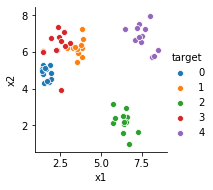

In [6]:
sns.pairplot(x_vars=['x1'], 
             y_vars=['x2'], 
             data=df_data, 
             hue='target')
plt.show()

### 5) [P] Read the reference for KMeans: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

### Now, create a clustering using KMeans. Let's assume you have prior knowledge that there are indeed 5 clusters, but you aren't aware of ground truth. Thus, you can only assess the SSE and silhouette coefficient for your clustering. Print the inertia_ (SSE) and the silhouette_score results for this clustering.

In [7]:
kmeans = KMeans(n_clusters=5).fit(X)

#inertia/SSE
kmeans.inertia_

25.674698692870933

In [8]:
#silhouette score
silhouette_score(X, kmeans.labels_)

0.6193221245493099

### 6) [P] Generate a scatterplot again, however, now color the points based off of the labels generated by the clustering, and NOT the correct labels. Add the centroids using a distinguishing color and size with an alpha=0.5.

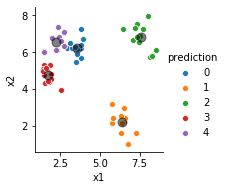

In [9]:
df_pred = df_data
df_pred.loc[:, 'prediction'] = kmeans.labels_
df_pred.loc[:,'prediction'] = df_pred.loc[:,'prediction'].astype('category')

sns.pairplot(x_vars=['x1'],
             y_vars=['x2'], 
             data=df_pred,
             hue='prediction')

#coordinates
center = kmeans.cluster_centers_

plt.scatter(center[:, 0], center[:, 1], c='black', s=80,alpha=0.5)
plt.show()

### 7) [P] Generate the same plots with a KMeans clustering with k=3 and k=4. You'll need this to explain your next steps.

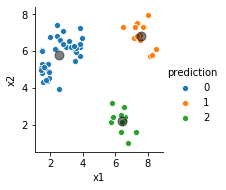

In [10]:
kmeans = KMeans(n_clusters=3).fit(X)

df_pred = df_data
df_pred.loc[:, 'prediction'] = kmeans.labels_
df_pred.loc[:,'prediction'] = df_pred.loc[:,'prediction'].astype('category')

sns.pairplot(x_vars=['x1'],
             y_vars=['x2'], 
             data=df_pred,
             hue='prediction')

#coordinates
center = kmeans.cluster_centers_

plt.scatter(center[:, 0], center[:, 1], c='black', s=80,alpha=0.5)
plt.show()

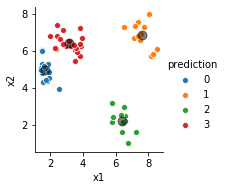

In [11]:
kmeans = KMeans(n_clusters=4).fit(X)

df_pred = df_data
df_pred.loc[:, 'prediction'] = kmeans.labels_
df_pred.loc[:,'prediction'] = df_pred.loc[:,'prediction'].astype('category')

sns.pairplot(x_vars=['x1'],
             y_vars=['x2'], 
             data=df_pred,
             hue='prediction')

#coordinates
center = kmeans.cluster_centers_

plt.scatter(center[:, 0], center[:, 1], c='black', s=80,alpha=0.5)
plt.show()

### 8) [P] Let's take a step backward and assume that you are uncertain about how many actual clusters you have. Evaluate cluster sizes from 2 through 10. Create a data frame that stores the SSE and the silhouette score for each k. Show the resulting data frame.

In [12]:
df_results = pd.DataFrame(columns = ['k','SSE','silhouette'])
for i in range(2,11):
    kmeans = KMeans(n_clusters=i).fit(X)
    df_results=df_results.append({'k':i,'SSE':kmeans.inertia_,'silhouette':silhouette_score(X, kmeans.labels_)},ignore_index=True)
df_results.loc[:,'k']=df_results.loc[:,'k'].astype('int')
df_results=df_results.set_index('k')
display(df_results)

SSE  silhouette
k                         
2   208.379992    0.591168
3    70.495647    0.716448
4    33.580373    0.653255
5    25.674699    0.619322
6    20.022497    0.587421
7    17.210070    0.488553
8    14.188638    0.461163
9    12.722104    0.453477
10   11.279234    0.468187

### 9) [P] Show the elbow plot (i.e. a line plot) of both measures on separate graphs. Use k as the x axis.

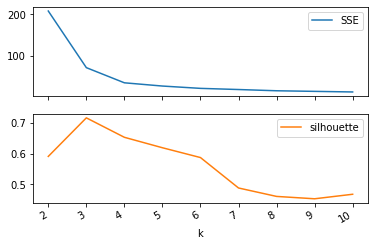

In [13]:
df_results.plot.line(subplots=True)
plt.show()

### 10) [M] What does the SSE suggest is the best value of k? What about the silhouette coefficient? Refer to your three plots above to help you explain what happened. Why do you think there are these discrepancies?

In the SSE graph, we see exponential decay with an inflection point somewhere between hte k=3 and k=4 mark. This is further supported by the silhouette plot as well, which has a local maximum around k=3 as well. 

I believe that this occurs since an increase of cluster (k) will decrease distance metrics between points and their respective cluster. This behavior will decrease both silhouette score and SSE, since more space being taken up by more clusters will mean that these distances will be lower. 

### 11) [P] Now, re-generate your clustering for k=5. You will likely notice that your labels will be different colors than your original labels. That's annoying. Write the code to remap your cluster labels to use the same order as your labels as your ground truth. And, re-generate the correct plot, AND the clustered plot. This will make it easier to distinguish the observations that have different labels between the plots. (HINT: How? Perhaps the easiest approach is to use the contingency_matrix function in sklearn.metrics.cluster package. Show the output of that, then think about how you can use that to get the best mapping.)

In [14]:
kmeans = KMeans(n_clusters=5).fit(X)
df_pred = df_data
df_pred.loc[:, 'prediction'] = kmeans.labels_
df_pred.loc[:,'prediction'] = df_pred.loc[:,'prediction'].astype('category')
con = contingency_matrix(df_pred['target'], df_pred['prediction'])
con

array([[ 0,  0,  0, 12,  0],
       [ 0, 12,  0,  0,  0],
       [12,  0,  0,  0,  0],
       [ 0,  1,  0,  1, 10],
       [ 0,  0, 12,  0,  0]])

In [15]:
row_max = con.argmax(axis=1)

result_array = np.array([row_max[0],0])
for i in range(1,5):
    list_i = [row_max[i],i]
    result_array = np.vstack([result_array,list_i])
remap_dict = dict(result_array)

df_pred.loc[:,'prediction'] = df_pred.loc[:,'prediction'].apply(lambda x: remap_dict[x])
df_pred.head()

x1        x2 target prediction
0  3.920853  6.701244      1          1
1  7.349579  7.531876      4          4
2  2.415558  6.811551      3          3
3  1.471362  4.780079      0          0
4  2.536789  3.920516      3          0

### 12) Re-generate your two plots above into a single plot that clearly highlights every point that has been assigned to an incorrect correct cluster.

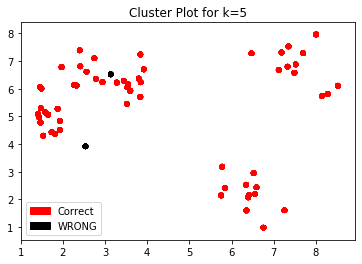

In [16]:
df_bool = df_pred
df_bool['match'] = (df_bool.target == df_bool.prediction)

#assign colors
for i in range(df_bool.shape[0]):
    if df_bool.iloc[i,4] == True:
        df_bool.iloc[i,4] = 'red'
    else:
        df_bool.iloc[i,4] = 'black'

# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for i in range(df_bool.shape[0]):
    ax.scatter(df_bool.x1, df_bool.x2, alpha=0.8, c=df_bool.match, s=20)

plt.title('Cluster Plot for k=5')
red_patch = mpatches.Patch(color='red', label='Correct')
black_patch = mpatches.Patch(color='black', label='WRONG')
plt.legend(handles = [red_patch,black_patch],loc=0)
plt.show()

### 13) [M] Since we do have ground truth, there are several metrics that are used to assess the quality of your clustering. Read the section on clustering performance evaluation in Scikit-learn's documentation page: https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation Pay close attention to the following: Adjusted Rand Index, Homogeneity, Completeness, and V-measure. In this section, very briefly describe each of these four measures. Though we did not explicitly cover them in class, these are good to know.

Adjusted Rand Index is a similarity function between two data clusters, normalizing the index value to be between 0 (randomly labeled clusters) and 1 (identically labeled clusters). 

Homogeneity is a trait of data clusters in which all points within a given cluster do belong to the same class.

Completeness is another trait of data clusters that is the 'reverse relationship' of homogeneity. That is, all points within the same class belong in the same cluster. 

V-measure acts as a 'harmonic mean' between the homogeneity and completeness metrics above. This will range between 0 and 1 as well, with numbers closer to one indicating stronger correlations.

### 14) [P] Create a new data frame that contains these four measures for all KMeans clusterings of k between 2-10. As before, show your data frame, then generate a plot for each. However, since each of these falls on the same scale, you could generate them on one plot, or show them as subplots.

In [17]:
df_measures = pd.DataFrame(columns=['k',
                                'adjusted_rand_index',
                                'homogeneity',
                                'completeness',
                                'v-measure'])

for i in range(2,11):
    kmeans = KMeans(n_clusters=i).fit(X)
    con = contingency_matrix(y_true, kmeans.labels_)
    
    row_max = con.argmax(axis=1)
    result_array = np.array([0,row_max[0]])
    for j in range(1,5):
        list_i = [j,row_max[j]]
        result_array = np.vstack([result_array,list_i])
    remap_dict = dict(result_array)
    y_remap = pd.Series(y_true).apply(lambda x: remap_dict[x]).values
    
    #gets each data column and make the row to append
    adj=adjusted_rand_score(y_remap, kmeans.labels_)
    homog=homogeneity_score(y_remap, kmeans.labels_)
    comp=completeness_score(y_remap, kmeans.labels_)
    v_measure=v_measure_score(y_remap, kmeans.labels_)
    df_measures = df_measures.append({'k': i,
                            'adjusted_rand_index': adj,
                            'homogeneity': homog,
                            'completeness': comp,
                            'v-measure': v_measure},
                            ignore_index=True)
    

df_measures=df_measures.set_index('k')
display(df_measures)

adjusted_rand_index  homogeneity  completeness  v-measure
k                                                              
2.0              1.000000     1.000000      1.000000   1.000000
3.0              1.000000     1.000000      1.000000   1.000000
4.0              0.854751     0.906093      0.889005   0.897468
5.0              0.916486     0.926984      0.929466   0.928223
6.0              0.862042     0.926984      0.868605   0.896846
7.0              0.803947     0.926984      0.815225   0.867520
8.0              0.670250     0.887176      0.718224   0.793810
9.0              0.594343     0.888972      0.677004   0.768642
10.0             0.611029     0.920717      0.670870   0.776183

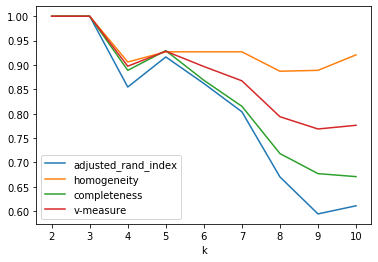

In [18]:
df_measures.plot.line()